In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
install.packages("BiocManager")
BiocManager::install("DESeq2")
install.packages("RColorBrewer")
install.packages("gplots")


In [ ]:
BiocManager::install("EnhancedVolcano")

In [ ]:
install.packages("ggrepel")

In [ ]:
install.packages("NMF")

In [ ]:
install.packages("ggfortify")

In [47]:
library(stats)
library(ggfortify)

In [ ]:
library(DESeq2)
library(tidyverse)
library(ggrepel)
library(EnhancedVolcano)

In [ ]:
library(RColorBrewer)
library(gplots)
library(NMF)

# Preprocessing

In [6]:
counts1 <- read.csv("SRR3414629.csv", sep="", header=FALSE)
counts2 <- read.csv("SRR3414630.csv", sep="", header=FALSE)
counts3 <- read.csv("SRR3414631.csv", sep="", header=FALSE)
counts4 <- read.csv("SRR3414635.csv", sep="", header=FALSE)
counts5 <- read.csv("SRR3414635.csv", sep="", header=FALSE)
counts6 <- read.csv("SRR3414636.csv", sep="", header=FALSE)

In [7]:
counts1 <-head(counts1, -5)
counts2 <-head(counts2, -5)
counts3 <-head(counts3, -5)
counts4 <-head(counts4, -5)
counts5 <-head(counts5, -5)
counts6 <-head(counts6, -5)

In [8]:
counts22 = cbind(counts1, counts2[2], counts3[2], counts4[2], counts5[2], counts6[2])
head(counts22)

,V1,V2,V2,V2,V2,V2,V2
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSMUSG00000000001.5,139,77,109,197,197,213
2,ENSMUSG00000000003.16,0,0,0,0,0,0
3,ENSMUSG00000000028.16,132,89,183,149,149,159
4,ENSMUSG00000000031.18,1,0,1,0,0,0
5,ENSMUSG00000000037.18,108,113,141,152,152,178
6,ENSMUSG00000000049.12,0,0,0,0,0,0


In [9]:
counts <- read.csv("SRR3414629.csv", sep="", header=FALSE)
colnames(counts) <- c("genes", "SRR3414629")
head(counts)

,genes,SRR3414629
,<chr>,<int>
1,ENSMUSG00000000001.5,139
2,ENSMUSG00000000003.16,0
3,ENSMUSG00000000028.16,132
4,ENSMUSG00000000031.18,1
5,ENSMUSG00000000037.18,108
6,ENSMUSG00000000049.12,0


In [10]:
colnames(counts22) <- c("genes", "SRR3414629", "SRR3414630", 
                      "SRR3414631", "SRR3414635", "SRR3414636", "SRR3414637")
head(counts22)

,genes,SRR3414629,SRR3414630,SRR3414631,SRR3414635,SRR3414636,SRR3414637
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSMUSG00000000001.5,139,77,109,197,197,213
2,ENSMUSG00000000003.16,0,0,0,0,0,0
3,ENSMUSG00000000028.16,132,89,183,149,149,159
4,ENSMUSG00000000031.18,1,0,1,0,0,0
5,ENSMUSG00000000037.18,108,113,141,152,152,178
6,ENSMUSG00000000049.12,0,0,0,0,0,0


In [11]:
counts22 <- counts22 %>% column_to_rownames(., var = 'genes')

# Normalization: RPM 

In [20]:
scaling_factor <- apply(counts22, 2, sum)/1000000
myRPM <- mapply('/', counts22, scaling_factor)

In [21]:
head(myRPM)

SRR3414629,SRR3414630,SRR3414631,SRR3414635,SRR3414636,SRR3414637
42.7771544,33.31620,29.3464281,59.19066,59.19066,66.32851
0.0000000,0.00000,0.0000000,0.00000,0.00000,0.00000
40.6229092,38.50833,49.2696913,44.76857,44.76857,49.51283
0.3077493,0.00000,0.2692333,0.00000,0.00000,0.00000
33.2369257,48.89260,37.9618933,45.66995,45.66995,55.42946
0.0000000,0.00000,0.0000000,0.00000,0.00000,0.00000


In [22]:
myRPM <- as.data.frame(myRPM)
rownames(myRPM) <- rownames(counts22)
head(myRPM)

,SRR3414629,SRR3414630,SRR3414631,SRR3414635,SRR3414636,SRR3414637
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000000001.5,42.7771544,33.31620,29.3464281,59.19066,59.19066,66.32851
ENSMUSG00000000003.16,0.0000000,0.00000,0.0000000,0.00000,0.00000,0.00000
ENSMUSG00000000028.16,40.6229092,38.50833,49.2696913,44.76857,44.76857,49.51283
ENSMUSG00000000031.18,0.3077493,0.00000,0.2692333,0.00000,0.00000,0.00000
ENSMUSG00000000037.18,33.2369257,48.89260,37.9618933,45.66995,45.66995,55.42946
ENSMUSG00000000049.12,0.0000000,0.00000,0.0000000,0.00000,0.00000,0.00000


In [23]:
table(rowSums(myRPM > 0.5))


    0     1     2     3     4     5     6 
38929  2379  1467  1461   908   971 10838 

In [24]:
summary(rowSums(myRPM > 0.5) >= 2)

   Mode   FALSE    TRUE 
logical   41308   15645 

In [26]:
myRPM.keep <- myRPM[rowSums(myRPM > 0.5) >= 2,]
dim(myRPM.keep)

[1] 15645     6

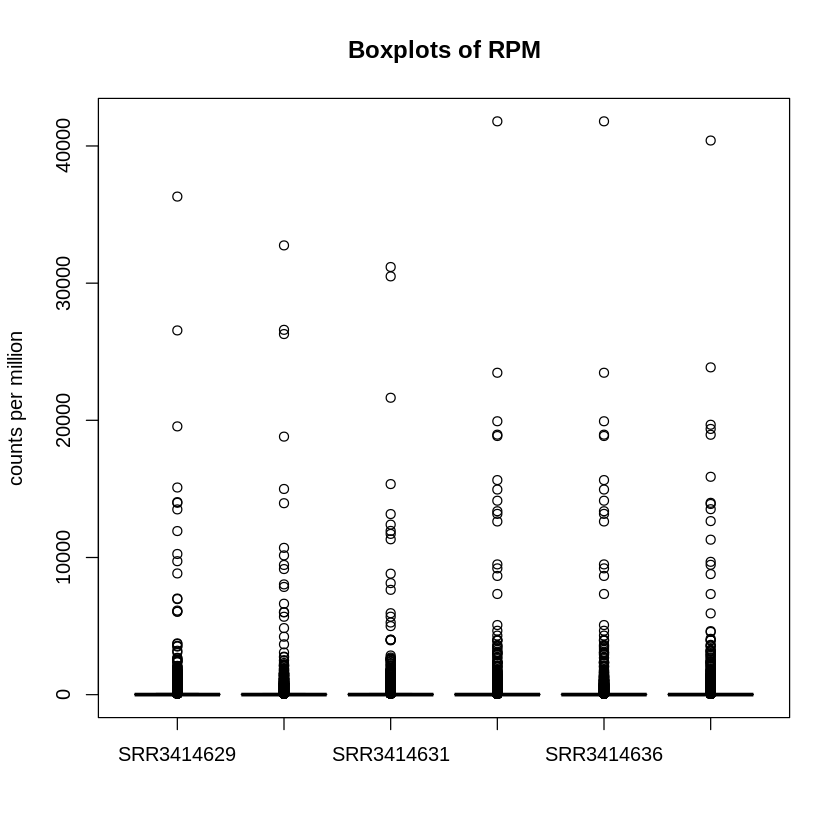

In [28]:
myRPM.keep <- as.matrix(myRPM.keep)
boxplot(myRPM.keep, xlab="", ylab="counts per million")
title("Boxplots of RPM")

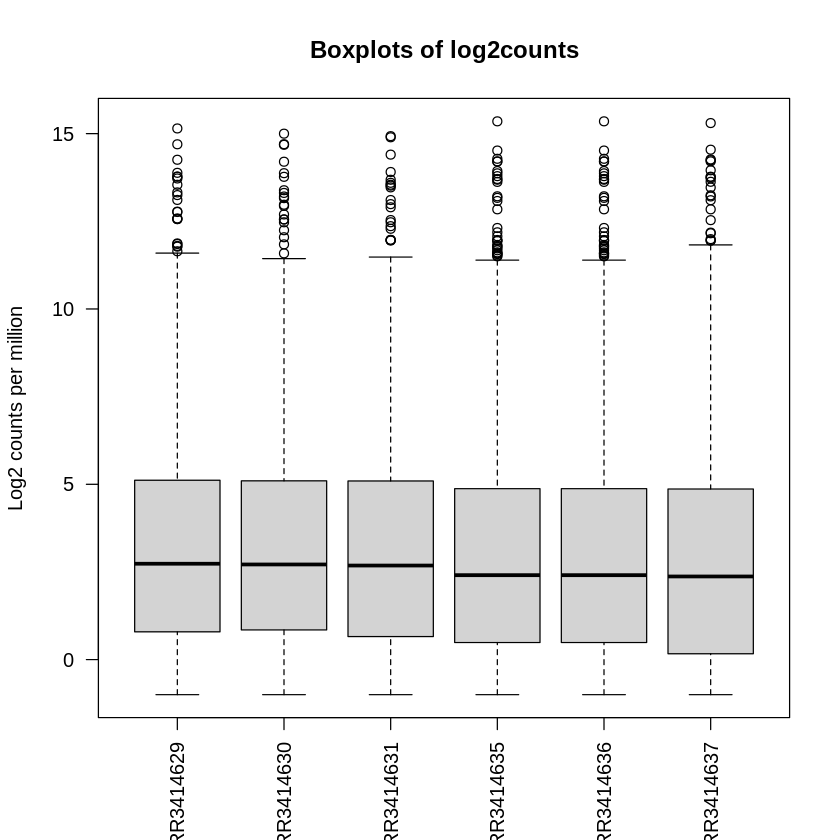

In [29]:
logcounts <- as.matrix(log2(myRPM.keep+0.5))
boxplot(logcounts, xlab="", ylab="Log2 counts per million",las=2)
title("Boxplots of log2counts")

# Visualization w/o normalization

In [30]:
head(counts22)

,SRR3414629,SRR3414630,SRR3414631,SRR3414635,SRR3414636,SRR3414637
,<int>,<int>,<int>,<int>,<int>,<int>
ENSMUSG00000000001.5,139,77,109,197,197,213
ENSMUSG00000000003.16,0,0,0,0,0,0
ENSMUSG00000000028.16,132,89,183,149,149,159
ENSMUSG00000000031.18,1,0,1,0,0,0
ENSMUSG00000000037.18,108,113,141,152,152,178
ENSMUSG00000000049.12,0,0,0,0,0,0


In [41]:
colData <- data.frame (first_column  = c("SRR3414629", "SRR3414630", 
                      "SRR3414631", "SRR3414635", "SRR3414636", "SRR3414637"),
                  second_column = c("Reprogrammed", "Reprogrammed", 
                      "Reprogrammed", "Control", "Control", "Control")
                  )
head(colData)

,first_column,second_column
,<chr>,<chr>
1,SRR3414629,Reprogrammed
2,SRR3414630,Reprogrammed
3,SRR3414631,Reprogrammed
4,SRR3414635,Control
5,SRR3414636,Control
6,SRR3414637,Control


In [42]:
colData <- colData %>% column_to_rownames(., var = 'first_column')

In [43]:
colData

,second_column
,<chr>
SRR3414629,Reprogrammed
SRR3414630,Reprogrammed
SRR3414631,Reprogrammed
SRR3414635,Control
SRR3414636,Control
SRR3414637,Control


In [ ]:
all(colnames(counts22) %in% rownames(colData))

[1] TRUE

In [ ]:
all(colnames(counts22) == rownames(colData))

[1] TRUE

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = counts22,
                       colData = colData,
                       design = ~ second_column)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [ ]:
dds

class: DESeqDataSet 
dim: 56953 6 
metadata(1): version
assays(1): counts
rownames(56953): ENSMUSG00000000001.5 ENSMUSG00000000003.16 ...
  ENSMUSG00002076991.1 ENSMUSG00002076992.1
rowData names(0):
colnames(6): SRR3414629 SRR3414630 ... SRR3414636 SRR3414637
colData names(1): second_column

In [ ]:
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

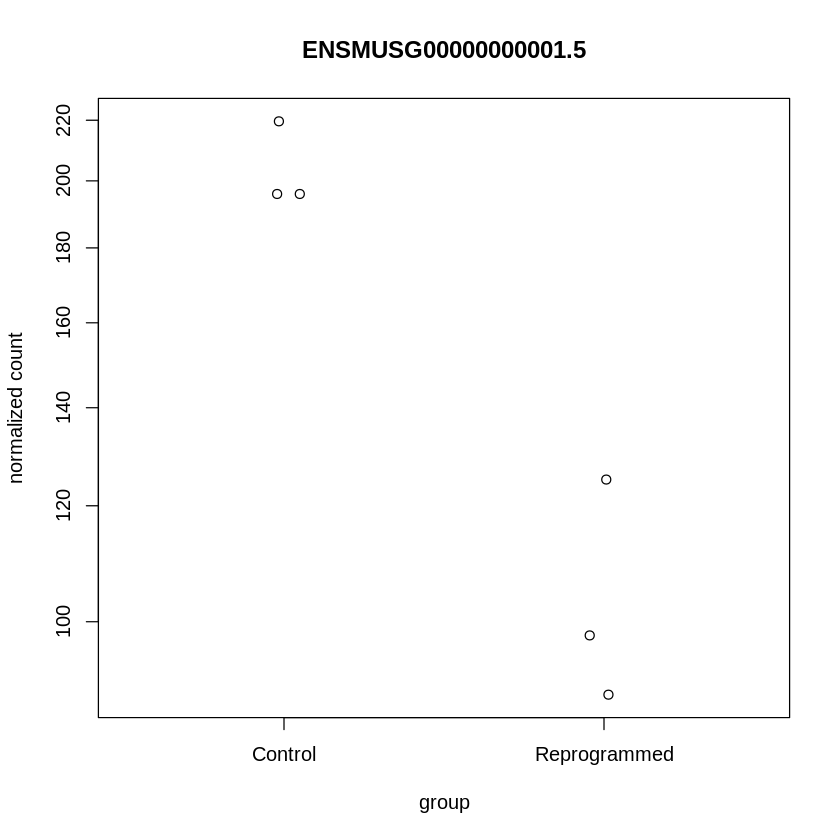

In [ ]:
plotCounts(dds, "ENSMUSG00000000001.5", intgroup ='second_column')

In [ ]:
dds <- DESeq(dds)
res <- results(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [ ]:
res

log2 fold change (MLE): second column Reprogrammed vs Control 
Wald test p-value: second column Reprogrammed vs Control 
DataFrame with 13870 rows and 6 columns
                       baseMean log2FoldChange     lfcSE       stat      pvalue
                      <numeric>      <numeric> <numeric>  <numeric>   <numeric>
ENSMUSG00000000001.5   153.4268     -0.9720250  0.177866 -5.4649186 4.63119e-08
ENSMUSG00000000028.16  139.8127     -0.2651501  0.177776 -1.4914840 1.35834e-01
ENSMUSG00000000037.18  139.8424     -0.4630467  0.186450 -2.4834903 1.30102e-02
ENSMUSG00000000058.7  1256.2318     -0.4779407  0.121677 -3.9279315 8.56796e-05
ENSMUSG00000000088.8    13.0516     -0.0444819  0.541869 -0.0820897 9.34575e-01
...                         ...            ...       ...        ...         ...
ENSMUSG00002076936.1    4.12428       1.035674  0.896869   1.154766 2.48186e-01
ENSMUSG00002076957.1   54.83794       0.208337  0.320185   0.650677 5.15255e-01
ENSMUSG00002076960.1    4.08730       5

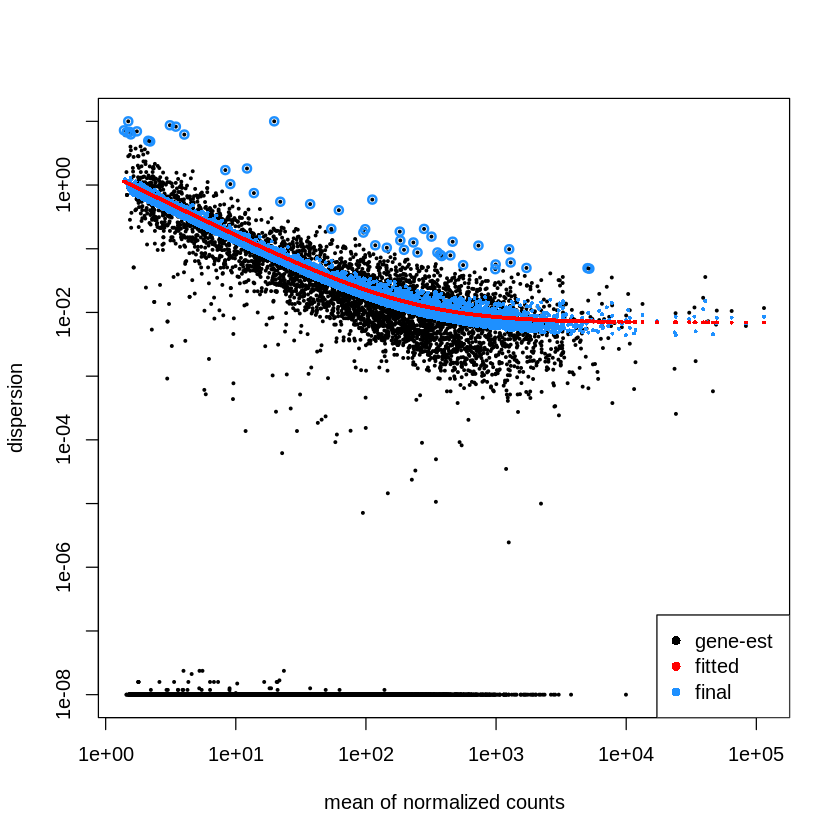

In [ ]:
plotDispEsts(dds)

In [ ]:
rld <- rlog(dds)

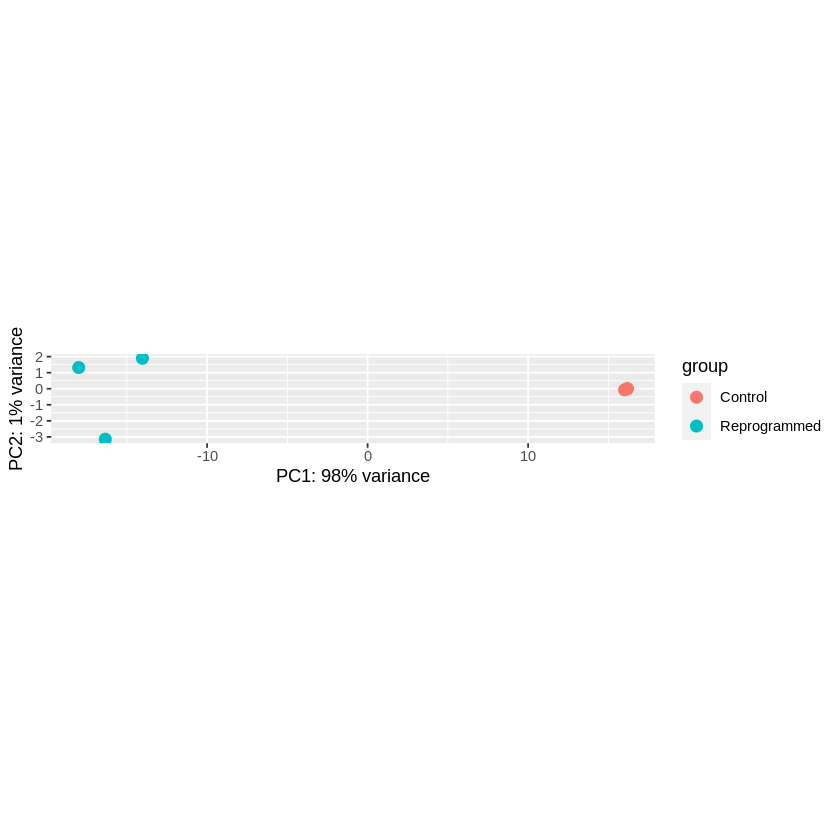

In [ ]:
plotPCA(rld,intgroup = "second_column")

In [ ]:
summary(res)


out of 13870 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2463, 18%
LFC < 0 (down)     : 1919, 14%
outliers [1]       : 1, 0.0072%
low counts [2]     : 0, 0%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



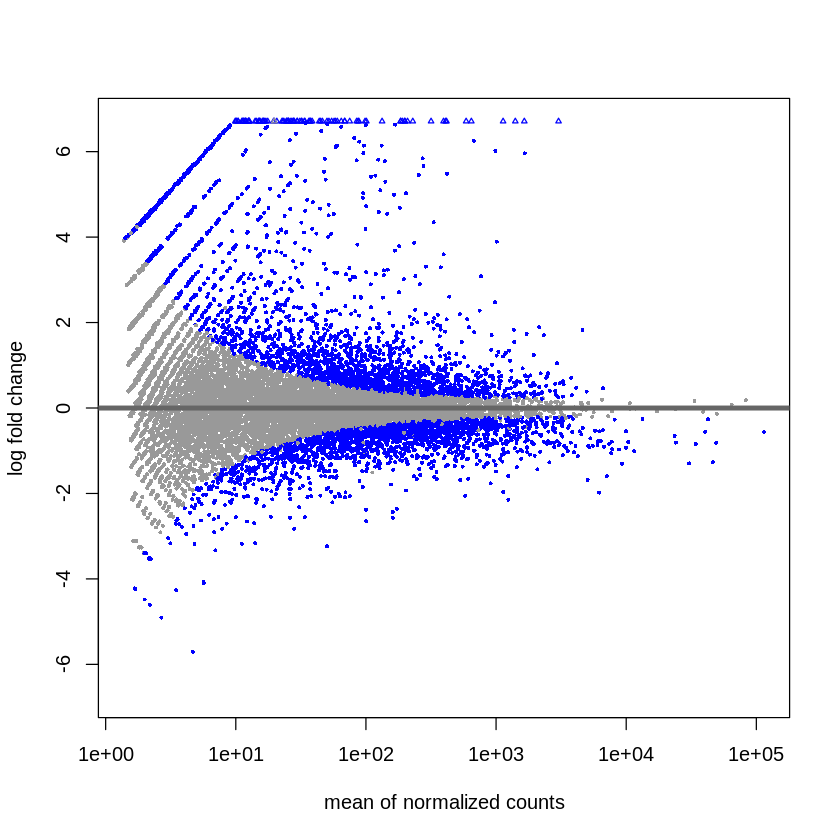

In [ ]:
plotMA(res)

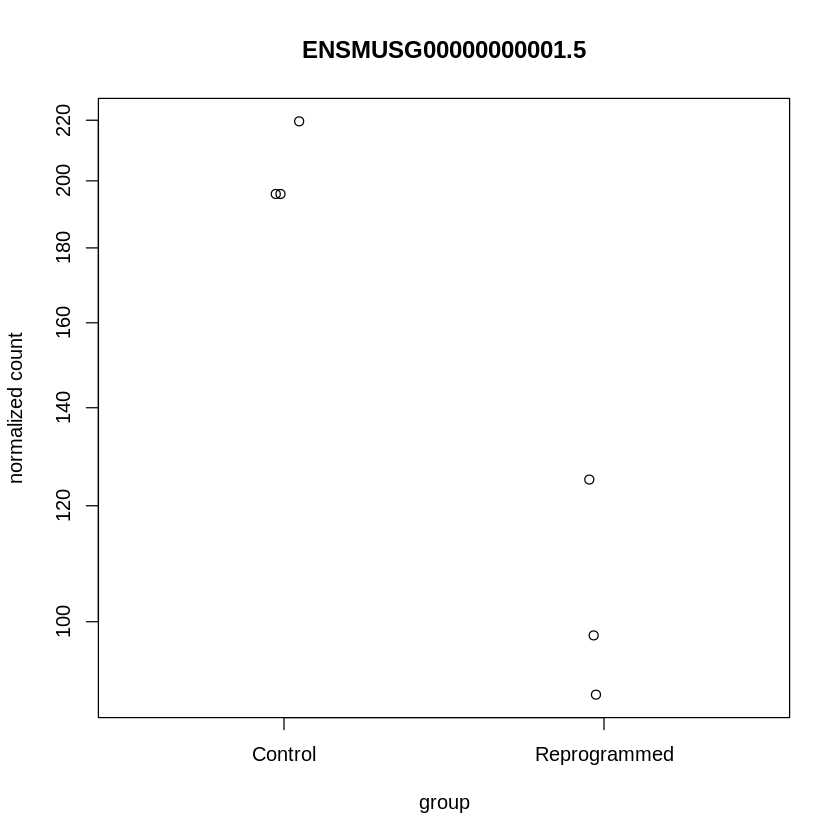

In [ ]:
p <- plotCounts(dds, "ENSMUSG00000000001.5", intgroup ='second_column')+ geom_text_repel() 

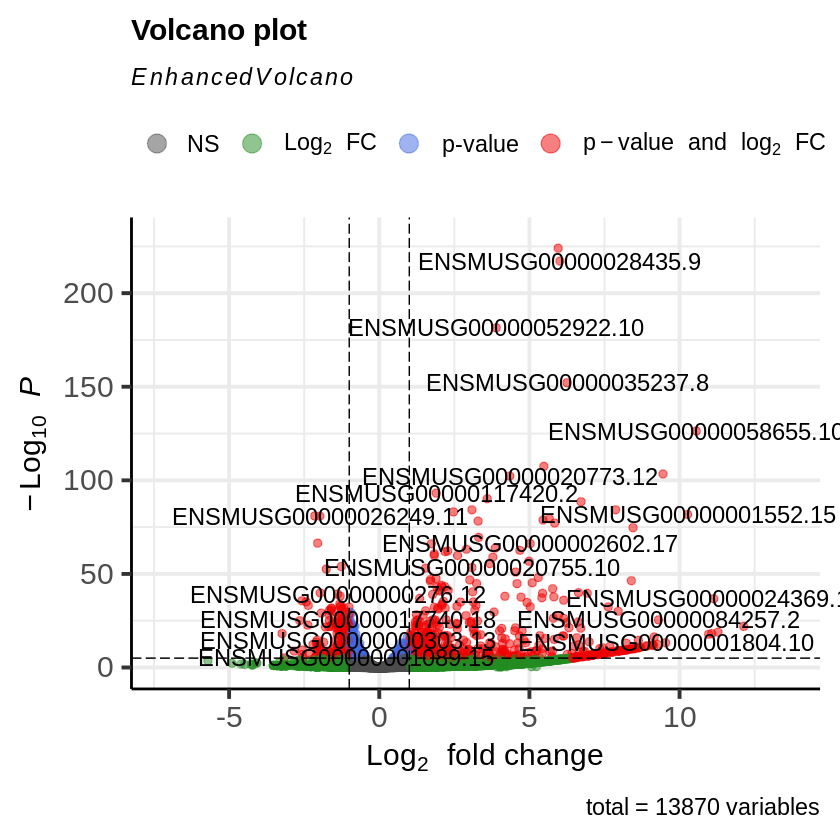

In [ ]:
EnhancedVolcano(res, x="log2FoldChange", y="padj", lab=rownames(res))

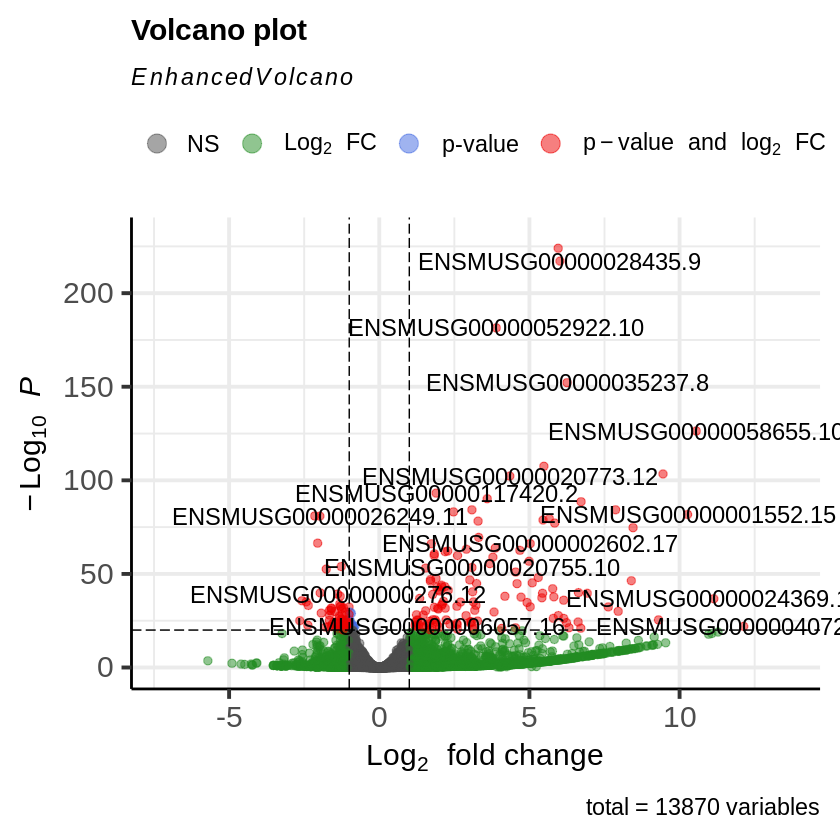

In [ ]:
EnhancedVolcano(res, x="log2FoldChange", y="padj", lab=rownames(res), pCutoff=1e-20)

# Visualization with RPM normalization

In [31]:
var_genes <- apply(logcounts, 1, var)
head(var_genes)

ENSMUSG00000000001.5 ENSMUSG00000000028.16 ENSMUSG00000000037.18 
           0.23283247            0.02076090            0.06816323 
 ENSMUSG00000000058.7  ENSMUSG00000000088.8 ENSMUSG00000000094.13 
           0.05917223            0.37576677            0.18161388

In [32]:
select_var <- names(sort(var_genes, decreasing=TRUE))[1:500]
head(select_var)

[1] "ENSMUSG00000058655.10" "ENSMUSG00000024369.17" "ENSMUSG00000001552.15"
[4] "ENSMUSG00000095241.3"  "ENSMUSG00000040728.16" "ENSMUSG00000056605.8"

In [33]:
highly_variable_lRpm <- logcounts[select_var,]
dim(highly_variable_lRpm)

[1] 500   6

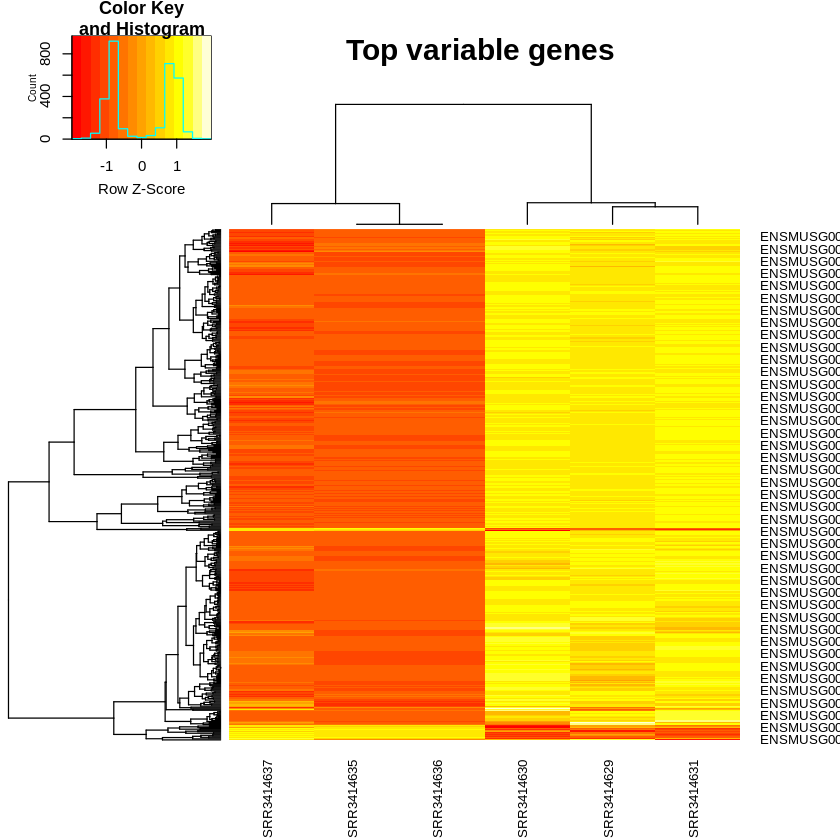

In [34]:
heatmap.2(highly_variable_lRpm,trace="none", main="Top variable genes ",scale="row",cexCol=.8,cexRow=.8)

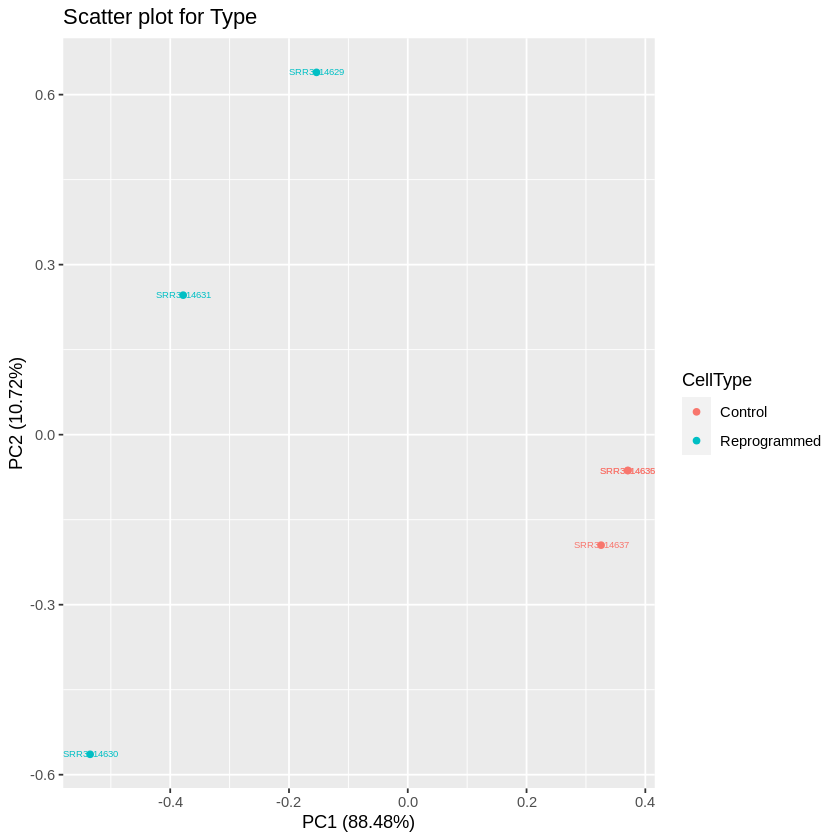

In [52]:
RPMforPCA <- t(myRPM.keep)
RPMforPCA <- as.data.frame(RPMforPCA)
RPMforPCA$CellType <- colData$second_column
pc <- prcomp(RPMforPCA[,1:ncol(RPMforPCA)-1])
autoplot(pc, data = RPMforPCA, label = TRUE, label.size = 2, colour = 'CellType')+ggplot2::ggtitle("Scatter plot for Type")

In [50]:
png(file="pca_results.png",res=100)
autoplot(pc, data = RPMforPCA, label = TRUE, label.size = 2, colour = 'CellType')+ggplot2::ggtitle("Scatter plot for CellType")
dev.off()

png 
  2